In [838]:
import tensorflow as tf
import numpy as np

In [870]:
all_x = genfromtxt("pokemon.csv", dtype=float32, delimiter=',', usecols=(2,), unpack=True)[1:]
all_y = genfromtxt("pokemon.csv", dtype=float32, delimiter=',', usecols=(14,), unpack=True)[1:]
print(all_x)
print(all_y)

[ 384.  366.  353.  338.  242.  129.   10.   25.   24.  161.  114.  333.
  132.   60.   42.   91.  139.  330.  328.  176.   97.   74.  127.   78.
  240.  276.  207.  176.  316.  305.  304.  242.  250.  226.  220.  185.
   42.  344.  108.  169.   15.   25.  222.  251.  139.   45.  129.  200.
  179.  104.  144.  157.  106.  203.   16.  240.   60.   80.   75.  136.
  231.   43.  140.  208.  128.  186.  149.   10.   86.  619.  500.  606.
  548.  528.  517.]
[  694.   669.   659.   640.   457.   243.    15.    47.    47.   305.
   213.   633.   247.   113.    79.   173.   265.   624.   619.   327.
   181.   141.   241.   146.   448.   530.   393.   335.   594.   567.
   579.   459.   471.   428.   418.   354.    80.   647.   205.   185.
    16.    27.   245.   272.   151.    49.   140.   217.   193.   113.
   157.   172.   115.   219.    18.   260.    66.    86.    81.   150.
   248.    46.   151.   226.   137.   200.   161.    10.    92.  1646.
  1253.  1591.  1362.  1059.  1340.]


In [821]:
x_data = np.array([384,114,42,97,304,169,104,136,43,619]).astype(np.float32)
y_data = np.array([694,213,79,181,579,185,113,150,46,1646]).astype(np.float32)

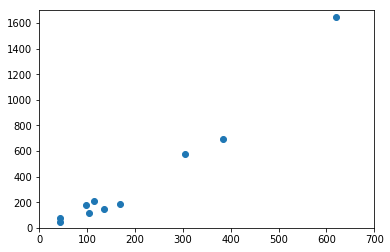

In [822]:
import matplotlib.pyplot as plt
%matplotlib inline
ax1 = plt.subplot()
ax1.set_xlim([0, 700])
ax1.set_ylim([0, 1700])
plt.scatter(x_data,y_data)

In [823]:
def step_gradient(b_current, m_current, learningRate):
    b_gradient = 0
    m_gradient = 0
    count = len(x_data)
    for i in range(count):
        b_gradient += -(2/count) * (y_data[i] - ((m_current * x_data[i]) + b_current))
        m_gradient += -(2/count) * x_data[i] * (y_data[i] - ((m_current * x_data[i]) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

In [824]:
def gradient_descent_runner(starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, learning_rate)
    return [b, m]

In [831]:
def compute_error_for_line_given_points(x, y, b, m):
    totalError = 0
    count = len(x_data)
    for i in range(count):
        totalError += (y[i] - (m * x[i] + b))
    return totalError / count

In [832]:
learning_rate = 0.00001
initial_b = 0 # initial y-intercept guess
initial_m = 0 # initial slope guess
num_iterations = 1200
[b, m] = gradient_descent_runner(initial_b, initial_m, learning_rate, num_iterations)
print(b,m)

-1.39758735037 2.22760620573


In [833]:
print(compute_error_for_line_given_points(x_data,y_data,b,m))

-58.1967812429


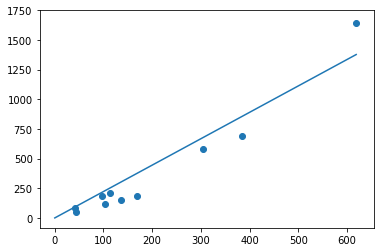

In [834]:
i = np.array([0,619])
plt.plot(i,m*i+b)
plt.scatter(x_data,y_data)

In [835]:
tx_data = np.array([366,10,330,207,129,106,75,208,149,606]).astype(np.float32)
ty_data = np.array([669,15,624,393,140,115,81,226,161,1591]).astype(np.float32)

In [836]:
print(compute_error_for_line_given_points(tx_data,ty_data,b,m))

-84.0571292227
